In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from google.colab.patches import cv2_imshow
from PIL import Image
from glob import glob
from google.colab import files
from os import path
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/нто/train (1).csv')
y = []
x_train = []

In [ ]:
def count_frames(cap):
  fps = cap.get(cv2.CAP_PROP_FPS) 
  frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
  print("fps=", int(fps), "frames=", int(frames))
  return int(frames)

def find_corners(imga):
  imga = imga
  return imga

def video_to_frames(x_link):
  x_l = []
  cap = cv2.VideoCapture(x_link)
  c_frames = count_frames(cap)
  if c_frames%5==0:
    step = (c_frames+1) // 5
  else:
    step = c_frames // 5
  for i in range(0, c_frames, step):
    ret, frame = cap.read(i)
    frame = find_corners(frame)
    frame = massiv_img(frame)
    x_l.append(frame)
  return x_l

def massiv_img(imga):
  input_arr = keras.preprocessing.image.img_to_array(imga)
  #input_arr = np.asarray(input_arr)
  input_arr = np.asarray(input_arr).astype(np.float32)
  #input_arr = np.expand_dims(input_arr, axis = 0)
  #arr = np.ndarray(imga, dtype='uint8')
  input_arr = input_arr / 255
  input_arr = np.resize(input_arr, (240, 426, 3))
  #input_arr = tf.convert_to_tensor(input_arr)
  return input_arr

In [ ]:
for label in range(0, 522):
  x_l = video_to_frames('/content/drive/MyDrive/нто/train_video/'+train.path[label])
  for i in x_l:
    x_train.append(i)
  if train.labels[label] == 'cloud, sunset':
    for i in range(len(x_l)):
        y.append([0, 0, 1, 0, 0, 0, 0, 1, 0])
  elif train.labels[label] == 'cloud, water':
    for i in range(len(x_l)):
      y.append([0, 0, 1, 0, 0, 0, 0, 0, 1])
  elif train.labels[label] == 'animal':
    for i in range(len(x_l)):
        y.append([1, 0, 0, 0, 0, 0, 0, 0, 0])
  elif train.labels[label] == 'car':
    for i in range(len(x_l)):
        y.append([0, 1, 0, 0, 0, 0, 0, 0, 0])
  elif train.labels[label] == 'cloud':
    for i in range(len(x_l)):
      y.append([0, 0, 1, 0, 0, 0, 0, 0, 0])
  elif train.labels[label] == 'dance':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 1, 0, 0, 0, 0, 0])
  elif train.labels[label] == 'fire':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 0, 1, 0, 0, 0, 0])
  elif train.labels[label] == 'flower':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 0, 0, 1, 0, 0, 0])
  elif train.labels[label] == 'food':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 0, 0, 0, 1, 0, 0])
  elif train.labels[label] == 'sunset':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 0, 0, 0, 0, 1, 0])
  elif train.labels[label] == 'water':
    for i in range(len(x_l)):
      y.append([0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
img = x_train[0]

In [ ]:
img

array([[[0.92941177, 0.8784314 , 0.8627451 ],
        [0.94509804, 0.89411765, 0.8784314 ],
        [0.9529412 , 0.9019608 , 0.8862745 ],
        ...,
        [0.91764706, 0.81960785, 0.7921569 ],
        [0.9411765 , 0.8509804 , 0.8235294 ],
        [0.9411765 , 0.8509804 , 0.8235294 ]],

       [[0.9411765 , 0.8901961 , 0.8745098 ],
        [0.9411765 , 0.8901961 , 0.8745098 ],
        [0.94509804, 0.89411765, 0.8784314 ],
        ...,
        [0.93333334, 0.8352941 , 0.80784315],
        [0.9529412 , 0.8627451 , 0.8352941 ],
        [0.9529412 , 0.8627451 , 0.8352941 ]],

       [[0.9843137 , 0.91764706, 0.89411765],
        [0.96862745, 0.9019608 , 0.8784314 ],
        [0.9607843 , 0.89411765, 0.87058824],
        ...,
        [0.9490196 , 0.85882354, 0.83137256],
        [0.9529412 , 0.8745098 , 0.84313726],
        [0.9529412 , 0.8745098 , 0.84313726]],

       ...,

       [[0.34117648, 0.47058824, 0.45882353],
        [0.33333334, 0.4627451 , 0.4509804 ],
        [0.36078432, 0

In [ ]:
img.shape

(240, 426, 3)

In [ ]:
x_train, y_train = shuffle(x_train, y)

In [ ]:
y_train = np.array(y)
x_train = np.asarray(x_train)

In [ ]:
model = keras.Sequential()
# 1st Convolutional Layer
model.add(keras.layers.Conv2D(filters = 96 , input_shape = (240, 426, 3),
kernel_size = ( 11 , 11 ), strides = ( 4 , 4 ),
padding = 'valid' ))
model.add(keras.layers.Activation( 'relu' ))
# Max-Pooling
model.add(keras.layers.MaxPooling2D(pool_size = ( 2 , 2 ),
strides = ( 2 , 2 ), padding = 'valid' ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# 2nd Convolutional Layer
model.add(keras.layers.Conv2D(filters = 256 , kernel_size = ( 11 , 11 ),
strides = ( 1 , 1 ), padding = 'valid' ))
model.add(keras.layers.Activation( 'relu' ))
# Max-Pooling
model.add(keras.layers.MaxPooling2D(pool_size = ( 2 , 2 ), strides = ( 2 , 2 ),
padding = 'valid' ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# 3rd Convolutional Layer
model.add(keras.layers.Conv2D(filters = 384 , kernel_size = ( 3 , 3 ),
strides = ( 1 , 1 ), padding = 'valid' ))
model.add(keras.layers.Activation( 'relu' ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# 4th Convolutional Layer
model.add(keras.layers.Conv2D(filters = 384 , kernel_size = ( 3 , 3 ),
strides = ( 1 , 1 ), padding = 'valid' ))
model.add(keras.layers.Activation( 'relu' ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# 5th Convolutional Layer
model.add(keras.layers.Conv2D(filters = 256 , kernel_size = ( 3 , 3 ),
strides = ( 1 , 1 ), padding = 'valid' ))
model.add(keras.layers.Activation( 'relu' ))
# Max-Pooling
model.add(keras.layers.MaxPooling2D(pool_size = ( 2 , 2 ), strides = ( 2 , 2 ),
padding = 'valid' ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# Flattening
model.add(keras.layers.Flatten())
# 1st Dense Layer
model.add(keras.layers.Dense( 4096 , input_shape = ( 240 * 426 * 3 , )))
model.add(keras.layers.Activation( 'relu' ))
# Add Dropout to prevent overfitting
model.add(keras.layers.Dropout( 0.4 ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# 2nd Dense Layer
model.add(keras.layers.Dense( 4096 ))
model.add(keras.layers.Activation( 'relu' ))
# Add Dropout
model.add(keras.layers.Dropout( 0.2 ))
# Batch Normalisation
model.add(keras.layers.BatchNormalization())
# Output Softmax Layer
model.add(keras.layers.Dense(9))
model.add(keras.layers.Activation( 'softmax' ))

In [ ]:
my_opt = keras.optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(optimizer=my_opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1506/1506 [==============================] - 43s 22ms/step - loss: 2.6370 - accuracy: 0.1448
Epoch 2/50
1506/1506 [==============================] - 34s 22ms/step - loss: 2.5673 - accuracy: 0.1547
Epoch 3/50
1506/1506 [==============================] - 34s 23ms/step - loss: 2.5550 - accuracy: 0.1537
Epoch 4/50
1506/1506 [==============================] - 34s 22ms/step - loss: 2.5005 - accuracy: 0.1597
Epoch 5/50
1506/1506 [==============================] - 33s 22ms/step - loss: 2.4718 - accuracy: 0.1544
Epoch 6/50
1506/1506 [==============================] - 34s 22ms/step - loss: 2.4738 - accuracy: 0.1647
Epoch 7/50
1506/1506 [==============================] - 34s 22ms/step - loss: 2.4238 - accuracy: 0.1640
Epoch 8/50
1506/1506 [==============================] - 34s 22ms/step - loss: 2.4206 - accuracy: 0.1647
Epoch 9/50
1506/1506 [==============================] - 33s 22ms/step - loss: 2.4256 - accuracy: 0.1707
Epoch 10/50
1506/1506 [==============================] - 33s 22m

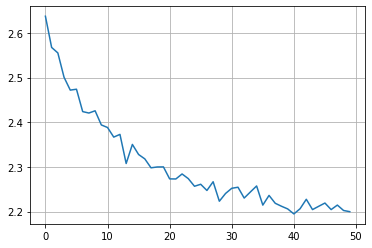

In [ ]:
learning = model.fit(x_train, y_train, batch_size=2, epochs=50)
plt.plot(learning.history['loss'])
plt.grid(True)
plt.show()